In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import os

In [2]:
from google.colab import drive

# Force remount Google Drive to obtain a new authentication code
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
import tensorflow as tf

# Path to your dataset directory in Google Drive
dataset_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/train'

# Create image dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70640 files belonging to 38 classes.


In [4]:
# Path to your validation dataset directory in Google Drive
validation_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/valid'

# Create validation image dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17577 files belonging to 38 classes.


In [5]:
# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top fully connected layers
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [6]:
# Freeze the base model layers
base_model.trainable = False


In [10]:
# Build the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(38, activation='softmax')  # Assuming 38 classes in the dataset
])

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2208/2208 [==============================] - 5555s 3s/step - loss: 0.6573 - accuracy: 0.7972 - val_loss: 0.1985 - val_accuracy: 0.9322
Epoch 2/10
2208/2208 [==============================] - 595s 269ms/step - loss: 0.3561 - accuracy: 0.8822 - val_loss: 0.1735 - val_accuracy: 0.9413
Epoch 3/10
2208/2208 [==============================] - 592s 268ms/step - loss: 0.2983 - accuracy: 0.9029 - val_loss: 0.1473 - val_accuracy: 0.9511
Epoch 4/10
2208/2208 [==============================] - 576s 261ms/step - loss: 0.2726 - accuracy: 0.9101 - val_loss: 0.1299 - val_accuracy: 0.9572
Epoch 5/10
2208/2208 [==============================] - 581s 263ms/step - loss: 0.2452 - accuracy: 0.9191 - val_loss: 0.1329 - val_accuracy: 0.9560
Epoch 6/10
2208/2208 [==============================] - 578s 262ms/step - loss: 0.2301 - accuracy: 0.9247 - val_loss: 0.1223 - val_accuracy: 0.9592
Epoch 7/10
2208/2208 [==============================] - 577s 261ms/step - loss: 0.2162 - accuracy: 0.9298 - val_lo

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_set)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

550/550 [==============================] - 114s 206ms/step - loss: 0.1229 - accuracy: 0.9625
Validation Accuracy: 96.25%


In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(training_set)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

2208/2208 [==============================] - 455s 206ms/step - loss: 0.0492 - accuracy: 0.9826
Training Accuracy: 98.26%


In [16]:
import tensorflow as tf
import os

# Specify the directory path where you want to save the model
save_directory = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection'

# Ensure the directory exists (create it if it doesn't)
os.makedirs(save_directory, exist_ok=True)

# Specify the full path including the filename for saving the model
model_filename = 'Resnet50_trained_plant_disease_model.keras'
model_path = os.path.join(save_directory, model_filename)

# Save the model to the specified path
model.save(model_path)
print(f"Model saved successfully at: {model_path}")

Model saved successfully at: /content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/Resnet50_trained_plant_disease_model.keras


In [17]:
history.history #Return Dictionary of history

{'loss': [0.657252848148346,
  0.35609686374664307,
  0.29831603169441223,
  0.27258116006851196,
  0.24515235424041748,
  0.2300594300031662,
  0.2161870002746582,
  0.20427893102169037,
  0.19576190412044525,
  0.19154518842697144],
 'accuracy': [0.7971687316894531,
  0.882248044013977,
  0.9029020667076111,
  0.910079300403595,
  0.9191393256187439,
  0.9246885776519775,
  0.9297565221786499,
  0.9337344169616699,
  0.9372451901435852,
  0.9373584389686584],
 'val_loss': [0.19847193360328674,
  0.17351123690605164,
  0.14733313024044037,
  0.12994515895843506,
  0.13293470442295074,
  0.12225724011659622,
  0.12172583490610123,
  0.11058951169252396,
  0.11636330187320709,
  0.1228644847869873],
 'val_accuracy': [0.9322410225868225,
  0.9412869215011597,
  0.9510723948478699,
  0.9571599364280701,
  0.9559651613235474,
  0.9591511487960815,
  0.9592649340629578,
  0.9643852710723877,
  0.9627354145050049,
  0.9624509215354919]}

In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [19]:
import matplotlib.pyplot as plt


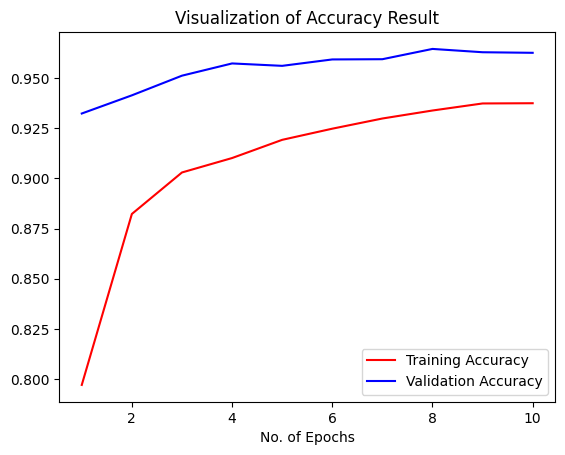

In [20]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [21]:
test_dir = '/content/drive/MyDrive/Plant-Disease-Detection/Plant_Disease_Detection/valid'


test_set = tf.keras.utils.image_dataset_from_directory(
   test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17577 files belonging to 38 classes.


In [22]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17577/17577 [==============================] - 631s 36ms/step


In [23]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [24]:
Y_true

<tf.Tensor: shape=(17577,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [25]:
predicted_categories

<tf.Tensor: shape=(17577,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [27]:
class_name = validation_set.class_names

In [28]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.98      0.97       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.98      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       426
                 Cherry_(including_sour)___healthy       0.99      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.88      0.92       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.96      0.

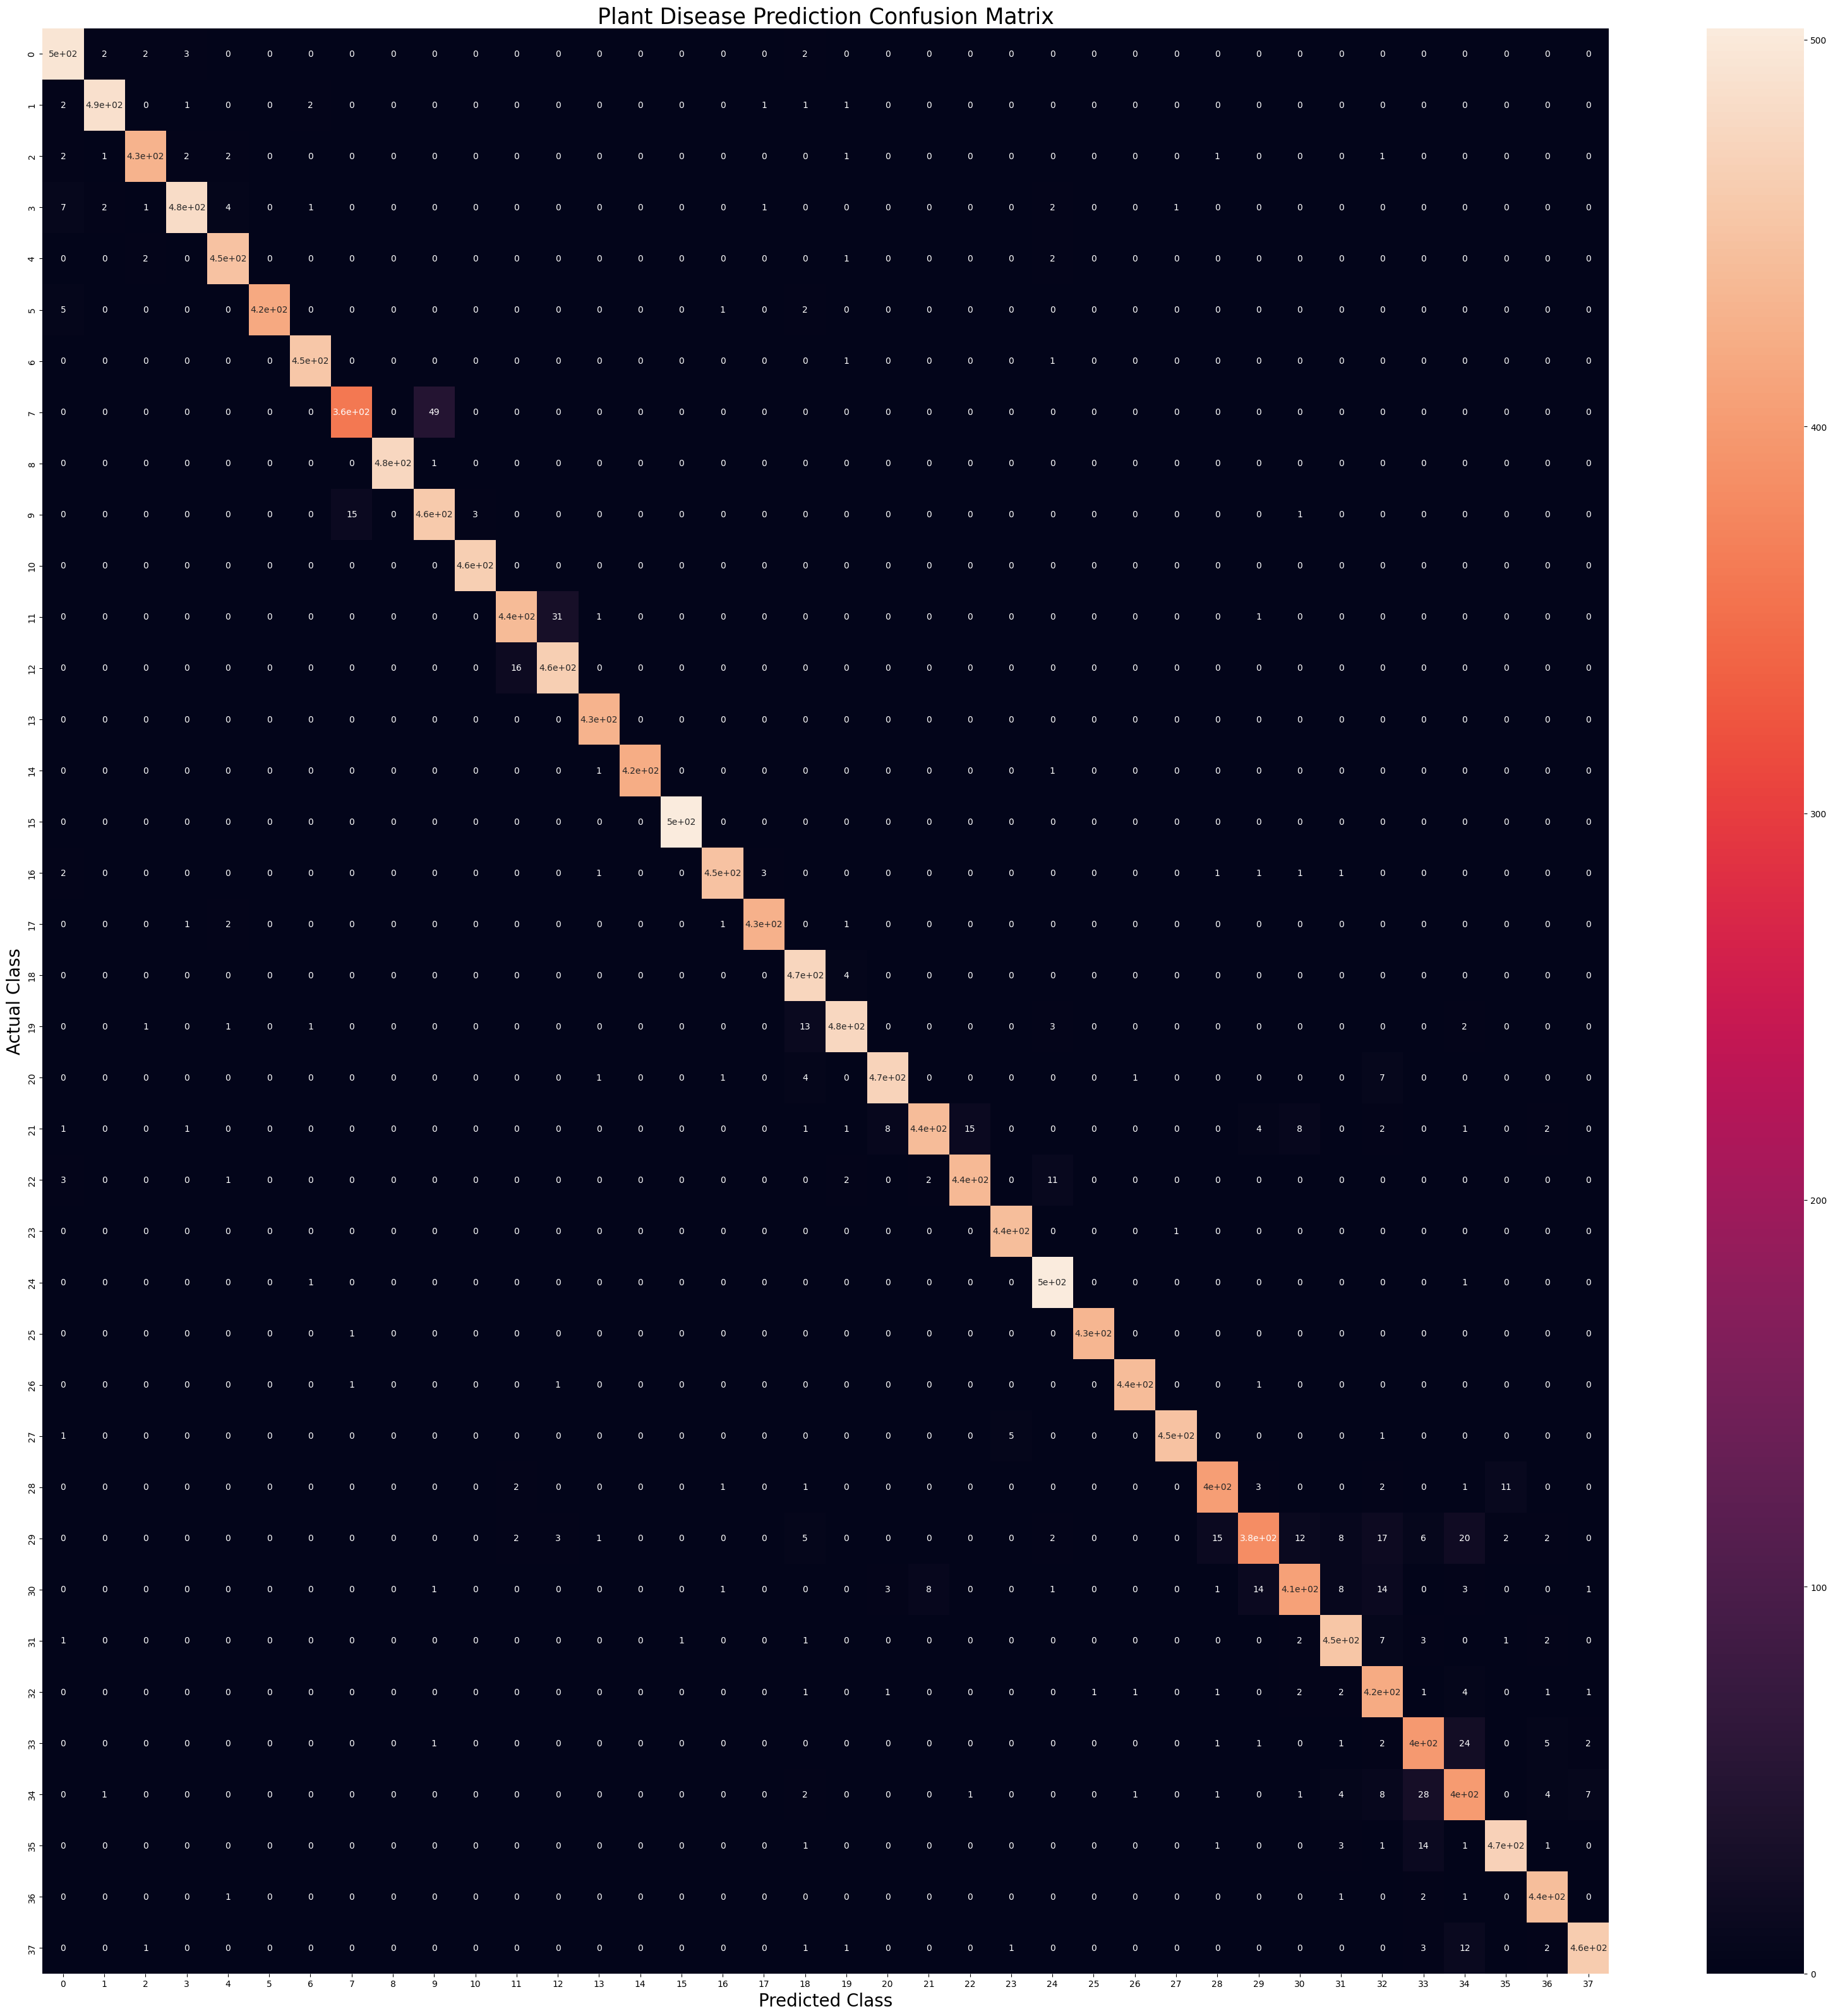

In [29]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()